In [240]:
# data analysis and wrangling

import pandas as pd
import numpy as np


# visualization
import matplotlib.pyplot as plt
import seaborn as sn

import warnings 
warnings.filterwarnings('ignore')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [241]:
df=pd.read_csv('customer churn analysis project')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [242]:
df.shape

(7043, 21)

In [243]:
#to select categorical features
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [244]:
#to select numerical features

numerical_features=df.select_dtypes(include=[np.number])
numerical_features.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [245]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [246]:
# No null values so not required to manage either mean,median or mode for categorical features

<AxesSubplot:xlabel='Churn', ylabel='count'>

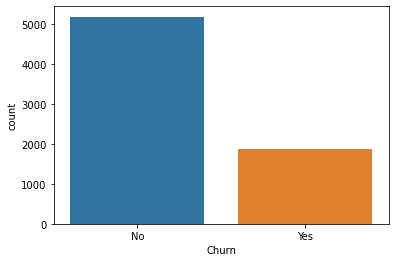

In [247]:
sn.countplot(df['Churn'])

In [248]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [249]:
# imbalance is there so need to use sampling technique 

In [250]:
# importing regular expression
import re

In [251]:
def clean_Contract(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z0-9]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['Contract']=df['Contract'].apply(clean_Contract)

In [252]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['PaymentMethod']=df['PaymentMethod'].apply(clean_text)
    

In [253]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['InternetService']=df['InternetService'].apply(clean_text)
    

In [254]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['MultipleLines']=df['MultipleLines'].apply(clean_text)
    

In [255]:
def clean_customerID(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z0-9]','',text)
    text=re.sub(r'\s+','',text)
    return text

df['customerID']=df['customerID'].apply(clean_Contract)

In [256]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590vhveg,Female,0,Yes,No,1,No,nophoneservice,dsl,No,...,No,No,No,No,monthtomonth,Yes,electroniccheck,29.85,29.85,No
1,5575gnvde,Male,0,No,No,34,Yes,no,dsl,Yes,...,Yes,No,No,No,oneyear,No,mailedcheck,56.95,1889.5,No
2,3668qpybk,Male,0,No,No,2,Yes,no,dsl,Yes,...,No,No,No,No,monthtomonth,Yes,mailedcheck,53.85,108.15,Yes
3,7795cfocw,Male,0,No,No,45,No,nophoneservice,dsl,Yes,...,Yes,Yes,No,No,oneyear,No,banktransferautomatic,42.30,1840.75,No
4,9237hqitu,Female,0,No,No,2,Yes,no,fiberoptic,No,...,No,No,No,No,monthtomonth,Yes,electroniccheck,70.70,151.65,Yes


In [257]:
# converting categeorical features to numeric 

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()


In [258]:
df['customerID']=LE.fit_transform(df['customerID'])
df['gender']=LE.fit_transform(df['gender'])
df['Partner']=LE.fit_transform(df['Partner'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['PhoneService']=LE.fit_transform(df['PhoneService'])
df['MultipleLines']=LE.fit_transform(df['MultipleLines'])
df['InternetService']=LE.fit_transform(df['InternetService'])
df['OnlineSecurity']=LE.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=LE.fit_transform(df['DeviceProtection'])
df['TechSupport']=LE.fit_transform(df['TechSupport'])
df['StreamingTV']=LE.fit_transform(df['StreamingTV'])
df['StreamingMovies']=LE.fit_transform(df['StreamingMovies'])
df['Contract']=LE.fit_transform(df['Contract'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LE.fit_transform(df['PaymentMethod'])
df['OnlineBackup']=LE.fit_transform(df['OnlineBackup'])
df['Churn']=LE.fit_transform(df['Churn'])

In [259]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [260]:
cor=df.corr()

In [261]:
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309


<AxesSubplot:>

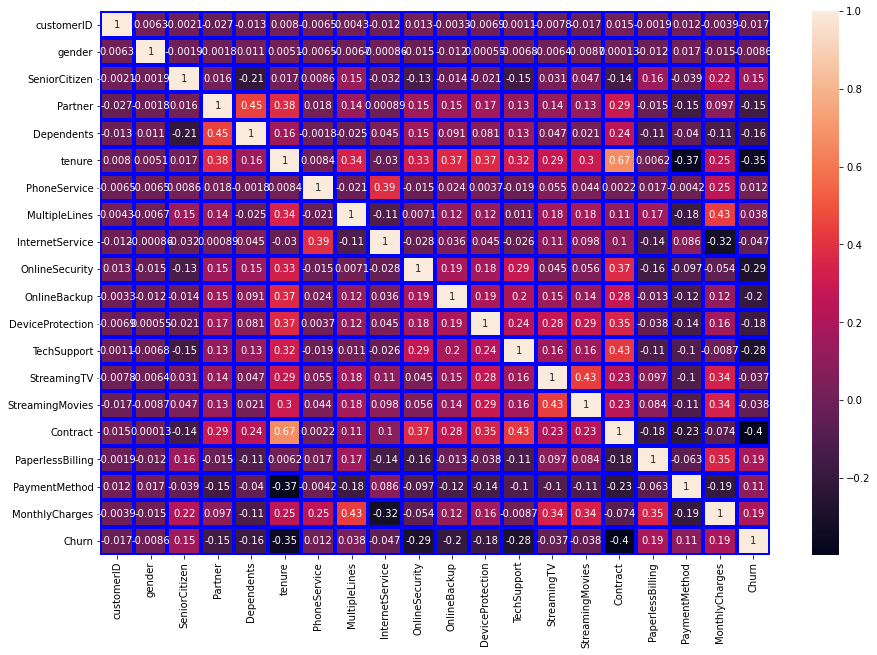

In [262]:
plt.figure(figsize=(15,10))
sn.heatmap(cor,annot=True,linewidth=3,linecolor='blue')

In [263]:
# After analysing we can drop customer id,gender,phone service and contract as these won't affect results

In [264]:
df.drop('customerID',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('PhoneService',axis=1,inplace=True)
df.drop('Contract',axis=1,inplace=True)
df.drop('TotalCharges',axis=1,inplace=True)

In [265]:
# plotting features against target variable

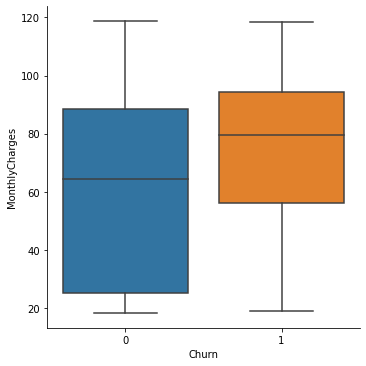

In [266]:
sn.factorplot(data=df,y='MonthlyCharges',x='Churn',size=5,kind='box')

In [267]:
# no churn when monthly charges are less and offers more scheme and range

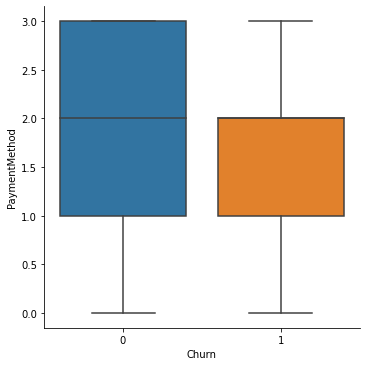

In [268]:
sn.factorplot(data=df,y='PaymentMethod',x='Churn',size=5,kind='box')

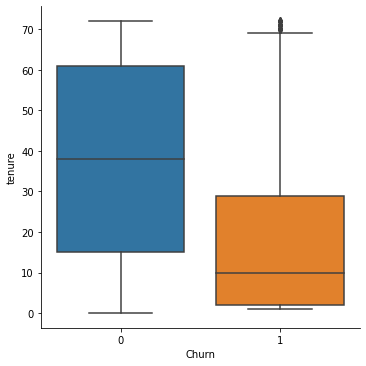

In [269]:
sn.factorplot(data=df,y='tenure',x='Churn',size=5,kind='box')

In [270]:
# more tenure less churn

In [271]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

SeniorCitizen          AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Partner             AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Dependents          AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
tenure              AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
MultipleLines       AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
InternetService     AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
OnlineSecurity      AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
OnlineBackup        AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
DeviceProtection       AxesSubplot(0.125,0.593621;0.0824468x0.130172)
TechSupport         AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
StreamingTV         AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
StreamingMovies     AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
PaperlessBilling    AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
PaymentMethod       AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
MonthlyCharges      

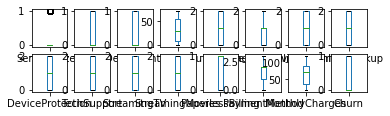

In [272]:
df.plot(kind='box',subplots=True,layout=(5,8))

In [273]:
collist=df.columns.values
ncol=15
nrows=10

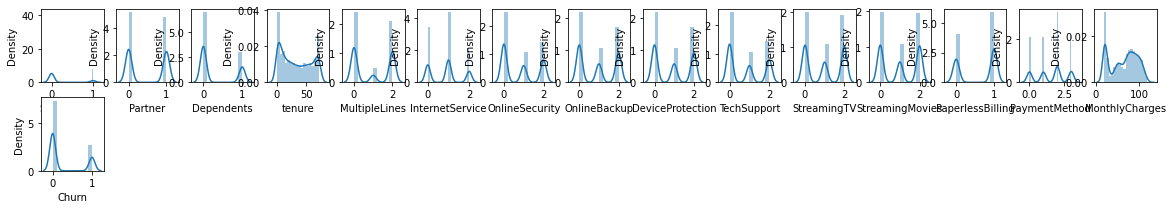

In [274]:
# plotting dist plot to check data distribution 
# snapshot of distribution curves of all input datas

plt.figure(figsize=(20,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.distplot(df[collist[i]])

In [275]:
# Outlier removal not required


In [ ]:
# standardisation of data

In [311]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,precision_score,recall_score
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Churn',axis=1))
x=scaled_df
y=df['Churn']

In [283]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.20511329,
         1.33486261, -0.25962894],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

In [218]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [286]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
x1,y1=sm.fit_resample(x,y)

In [287]:
y1.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [295]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=40)

In [296]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x1_train,y1_train)
    pred=mod.predict(x1_test)
    acc=accuracy_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"on random_state",maxRs)

best accuracy is 0.7909822866344606 on random_state 141


In [297]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=141)

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [298]:
DTC=DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred=DTC.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.7754155392346347


In [299]:
RFC=RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred=RFC.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.8488596830305373


In [300]:
sv=SVC()
sv.fit(x1_train,y1_train)
pred=sv.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc)

0.7970622342481639


In [294]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

In [301]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.7706876060922335


In [302]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.8417180228960758


In [303]:
print(cross_val_score(sv,x1,y1,cv=5).mean())

0.7912672695390665


In [304]:
#SVC parameters hyper tuning
from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,10,100,500],
           'kernel':['poly','rbf','sigmoid']
           }

In [305]:
GCV_SVC=GridSearchCV(SVC(),parameters,cv=5)
GCV_SVC.fit(x1_train,y1_train)
GCV_SVC.best_params_

{'C': 100, 'kernel': 'rbf'}

In [306]:
SVC_mod=SVC(C=100,kernel='rbf')
SVC_mod.fit(x1_train,y1_train)
pred=SVC_mod.predict(x1_test)
print(accuracy_score(y1_test,pred)*100)

82.41206030150754


In [308]:
#RandomForestClassifier hyper tuning

parameters={'n_estimators':[100],
           'max_features':['auto','sqrt'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [309]:
GCV_RF=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV_RF.fit(x1_train,y1_train)
GCV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [310]:
RF_mod=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

81.43100511073254


In [312]:
# saving the model

import joblib
joblib.dump(SVC_mod,"customerchurnprediction.pkl")

['customerchurnprediction.pkl']

# Conclusion- SVC is the most apt model for customer churn prediction